1. Importing Libraries
We will be importing the pandas and numpy libraries.

In [ ]:
import pandas as pd
import numpy as np

2. Reading the Dataset from our CSV file
The dataset used contains aviation accident data from 1962 to 2023 on civil aviation accidents and selected incidents in the United States and international waters. 

In [7]:
# Let's read the data from the CSV file and create the dataframe to be used

df = "AviationData.csv"
df1 = pd.read_csv(df, encoding = 'ISO-8859-1')

#Preview of the first 5 rows of the data

print(df1.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country Latitude Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States      NaN       NaN          NaN   
1   BRIDGEPORT, CA  United States      NaN       NaN          NaN   
2    Saltville, VA  United States  36.9222  -81.8781          NaN   
3       EUREKA, CA  United States      NaN       NaN          NaN   
4       Canton, OH  United States      NaN       NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...         

C:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
# Getting to know more about the dataset by accessing its information

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

3. Dealing with Missing Data

We have to detect missing data first, then deal with them in order to move forward. We have three options for dealing with missing data --removing them from the dataset, keeping them, or replacing them with another value.

3.1. Remove
This is the easiest way to deal with missing values by dropping columns and/or rows. This is a valid strategy on very large datasets. 
For this strategy, it also does not matter if we are dealing with continous or categorical data.

3.2. Replace
We can also deal with missing values by replacing them with a common value. The downside of this is that it can introduce noise into our dataset.

3.3. Keep
Sometimes the knowledge that a value is missing can itself be informative for us. If knowing that a value is missing tells you something, then it is often worth keeping the missing values using the following strategies.


In [9]:
# Checking for Missing Values
# True indicates a missing value and False indicates no missing value.

missing_values = df1.isna()
print(missing_values)

       Event.Id  Investigation.Type  Accident.Number  Event.Date  Location  \
0         False               False            False       False     False   
1         False               False            False       False     False   
2         False               False            False       False     False   
3         False               False            False       False     False   
4         False               False            False       False     False   
...         ...                 ...              ...         ...       ...   
88884     False               False            False       False     False   
88885     False               False            False       False     False   
88886     False               False            False       False     False   
88887     False               False            False       False     False   
88888     False               False            False       False     False   

       Country  Latitude  Longitude  Airport.Code  Airport.Name

In [10]:
# Count missing values in Each Column and Rows. 
# This way we can determine how much of our data is missing.

missing_values = df1.isna()
print(missing_values)

       Event.Id  Investigation.Type  Accident.Number  Event.Date  Location  \
0         False               False            False       False     False   
1         False               False            False       False     False   
2         False               False            False       False     False   
3         False               False            False       False     False   
4         False               False            False       False     False   
...         ...                 ...              ...         ...       ...   
88884     False               False            False       False     False   
88885     False               False            False       False     False   
88886     False               False            False       False     False   
88887     False               False            False       False     False   
88888     False               False            False       False     False   

       Country  Latitude  Longitude  Airport.Code  Airport.Name

In [11]:
rows_with_missing = df1[df1.isna().any(axis=1)]
print(rows_with_missing)

             Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country Latitude Longitude Airport.Code  \
0      MOOSE CREEK, ID  United States      NaN       NaN      

In [21]:
# Dropping irrelevant columns because we won't need them during Analysis
# No question to be answered requires that column.

df1.drop(["Longitude", "Airport.Code", "Airport.Name", "Air.carrier", "Schedule"], axis=1,inplace = True)
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,...,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,...,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,...,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,...,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [23]:
# Data Cleaning Action:checking the missing values
# Explanation:this ensures the data is complete

#checking missing values
df1.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

In [25]:
# Data Cleaning Action:dropping missing values
# Explanation:for credibity of the dataset
#
clean_df1=df1.dropna(how="all")
clean_df1[:88889]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,...,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,...,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,...,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,...,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,091,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,091,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,091,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


4. Answering Questions

We will answer the following questions with our dataset using Python.
    i). Filter aircraft makes and analyze there accident rates and severity.
    ii). Compare accidents by aircraft Make in relation to Broad phase of flight.
    iii). Assess which aircraft types handle poor weather conditions better, especially if your operations will involve flights in variable weather regions.

In [26]:
df1.to_csv("AviationData2.csv")

In [27]:
df2=pd.read_csv("AviationData2.csv")
df2.head()

C:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,...,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,...,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,...,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,...,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,...,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [29]:
# Filter data by aircraft Make (e.g. Cessna, Rockwell, Piper) and analyze there accident rates and severity.
# Calculate the number of accidents, fatalities, injury severity, and aircraft damage per aircraft model.

#Identify the unique aircraft makes in the dataset
unique_makes = df2['Make'].unique()

print(unique_makes)


['Stinson' 'Piper' 'Cessna' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']


In [40]:
# Following the display above, we will need to clean the data and focus on valid aircraft manufacturers.
# We will therefore filter out unusual or non-standard entries

# Filtering by the most common manufacturers, with a significant number of entries in the dataset.

make_counts = df2['Make'].value_counts()

# Displays the top 10 most frequent makes

print(make_counts.head(10))


Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: Make, dtype: int64


In [44]:
# Convert the 'Make' column to uppercase for uniformity
df2['Make'] = df2['Make'].str.upper()

# Define a list of makes you're interested in analyzing
makes_of_interest = ['Cessna', 'Piper', 'Boeing']

# Filter the DataFrame to only include rows where 'Make' is in the list
filtered_df = df2[df2['Make'].isin(makes_of_interest)]

make_counts = df2['Make'].value_counts()

print(make_counts.head())



CESSNA    27149
PIPER     14870
BEECH      5372
BOEING     2745
BELL       2722
Name: Make, dtype: int64


In [46]:
# Calculate number of accidents per make in the top 5 most frequent makes

filtered_df = df2[df2['Make'].isin(['CESSNA', 'PIPER', 'BEECH', 'BOEING', 'BELL'])]                             

accident_stats = filtered_df.groupby('Make').agg({
    'Accident.Number': 'count',  # Count the number of accidents
    'Total.Fatal.Injuries': 'sum',  # Sum the fatalities
    'Total.Serious.Injuries': 'sum',  # Sum the serious injuries
    'Total.Minor.Injuries': 'sum',  # Sum the minor injuries
    'Aircraft.damage': lambda x: (x == 'Destroyed').sum()  # Count aircraft destroyed
}).rename(columns={
    'Accident.Number': 'Total_Accidents',
    'Total.Fatal.Injuries': 'Fatalities',
    'Total.Serious.Injuries': 'Serious_Injuries',
    'Total.Minor.Injuries': 'Minor_Injuries',
    'Aircraft.damage': 'Aircraft_Destroyed'
})

# Display the accident statistics

print(accident_stats)

        Total_Accidents  Fatalities  Serious_Injuries  Minor_Injuries  \
Make                                                                    
BEECH              5372      3784.0            1095.0          1341.0   
BELL               2722      1332.0             878.0          1122.0   
BOEING             2745      8748.0            2157.0          2761.0   
CESSNA            27149      9641.0            4894.0          6876.0   
PIPER             14870      6689.0            3059.0          3757.0   

        Aircraft_Destroyed  
Make                        
BEECH                 1585  
BELL                   708  
BOEING                 170  
CESSNA                5202  
PIPER                 3428  


In [51]:
# Assess Flight Phases

#    - Investigate which aircraft types have more accidents in specific phases (e.g., takeoff or landing).
#   - Aircraft that perform consistently across all flight phases might be considered lower risk.

# We are only working with the top 5 Makes.

filtered_df = df2[df2['Make'].isin(['CESSNA', 'PIPER', 'BEECH', 'BOEING', 'BELL'])]                             

# Group by 'Make' and 'Broad.phase.of.flight', and count the number of accidents

make_flight_phase_stats = filtered_df.groupby(['Make', 'Broad.phase.of.flight']).agg({
    'Accident.Number': 'count'  # Count the number of accidents
}).rename(columns={
    'Accident.Number': 'Total_Accidents'
}).reset_index()

# Display the comparison
print(make_flight_phase_stats)



      Make Broad.phase.of.flight  Total_Accidents
0    BEECH              Approach              606
1    BEECH                 Climb              177
2    BEECH                Cruise              733
3    BEECH               Descent              158
4    BEECH             Go-around              140
5    BEECH               Landing              914
6    BEECH           Maneuvering              204
7    BEECH                 Other                6
8    BEECH              Standing               57
9    BEECH               Takeoff              841
10   BEECH                  Taxi              107
11   BEECH               Unknown               31
12    BELL              Approach              138
13    BELL                 Climb               33
14    BELL                Cruise              419
15    BELL               Descent               42
16    BELL             Go-around                3
17    BELL               Landing              220
18    BELL           Maneuvering              624


In [52]:
# Risk by Weather Condition

# Assess which aircraft types handle poor weather conditions better, especially if your operations will involve flights in variable weather regions.

# We are only working with the top 5 Makes.

filtered_df = df2[df2['Make'].isin(['CESSNA', 'PIPER', 'BEECH', 'BOEING', 'BELL'])]      

# Group by 'Make' and 'Weather.Condition', and count the number of accidents

make_weather_condition_stats = filtered_df.groupby(['Make', 'Weather.Condition']).agg({
    'Accident.Number': 'count'  # Count the number of accidents
}).rename(columns={
    'Accident.Number': 'Total_Accidents'
}).reset_index()

# Display the comparison
print(make_weather_condition_stats)

      Make Weather.Condition  Total_Accidents
0    BEECH               IMC              765
1    BEECH               UNK               64
2    BEECH               Unk               12
3    BEECH               VMC             4353
4     BELL               IMC              148
5     BELL               UNK               27
6     BELL               Unk                5
7     BELL               VMC             2348
8   BOEING               IMC              216
9   BOEING               UNK               94
10  BOEING               Unk               44
11  BOEING               VMC             1331
12  CESSNA               IMC             1898
13  CESSNA               UNK              248
14  CESSNA               Unk               55
15  CESSNA               VMC            24202
16   PIPER               IMC             1368
17   PIPER               UNK              147
18   PIPER               Unk               31
19   PIPER               VMC            12926


5. Analysis

5.1. Which aircraft type has the lowest accident rate? 
Here we compare the total number of accidents and the number of severe incidents for the top 5 Makes.

Accident Distribution: the bargraph shows that CESSNA has the highest number of accidents (27,149), significantly more than any other make, followed by PIPER (14,870) and BEECH (5,372). BELL and BOEING have relatively lower accident counts, with BELL having the lowest.

Trend and Insight: BELL's lower accident rate might suggest robust safety features or operational protocols. 
       
5.2. Which aircraft from the top 5 makes (BEECH, BELL, BOEING, CESSNA, and PIPER) are least affected by weather conditions?

We get to assess which aircraft make handles poor weather conditions better, especially if operations will involve flights in variable weather regions. We focus on the total number of accidents under different weather conditions categorised as :IMC, VMC, and UNK/Unk. 

This analysis provides insights into how different aircraft makes perform under challenging weather conditions, which can inform safety strategies and operational planning.

Least Affected by IMC: BELL has the lowest percentage of accidents under IMC (5.86%), suggesting it is the least affected by adverse weather conditions among the makes analyzed.

Overall Trends: While CESSNA has the highest total number of accidents, its proportion of IMC-related accidents is relatively low compared to its total, indicating a high volume of operations in VMC.

Significance: The lower IMC accident rate for BELL may reflect operational practices, aircraft design, or mission profiles that mitigate weather-related risks.

    
5.3. Analysis of the aircraft make accidents with regards to the broad phase of flight. This analysis will help identify which phases of flight are most prone to accidents for each top 5 aircraft make.

Accidents are categorized by the broad phase of flight, such as Approach, Climb, Cruise, Descent, Landing, etc.

Landing and Takeoff: These phases are consistently among the highest for accidents across all makes, highlighting the critical nature of these operations.

Cruise Accidents: While generally considered a stable phase, cruise accidents are notably high for CESSNA and PIPER, possibly due to the high volume of flights or specific operational contexts.

Maneuvering: BELL shows a significant number of accidents during maneuvering, indicating a potential area for safety improvements.


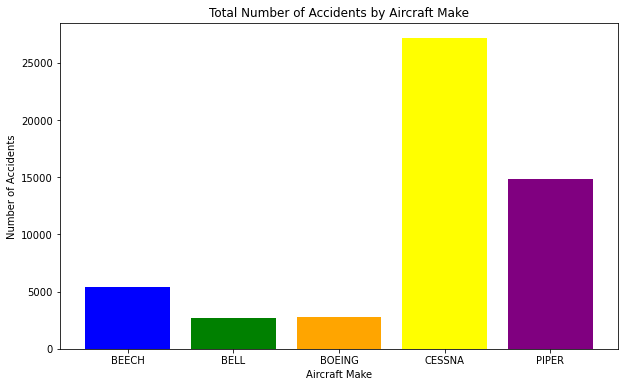

In [53]:
#Visualization for aircraft make with the lowest accident rate

import matplotlib.pyplot as plt

#Use to Total Accidents per top 5 make data

aircraft_make = ['BEECH', 'BELL', 'BOEING', 'CESSNA', 'PIPER']
total_accidents = [5372, 2722, 2745, 27149, 14870]

#We visualize the data on a barchart

plt.figure(figsize = (10, 6))
plt.bar(aircraft_make, total_accidents, color=['blue', 'green', 'orange', 'yellow', 'purple'])

#Titles and Lables

plt.title('Total Number of Accidents by Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')

#Plot
plt.tight_layout
plt.show()

In [54]:
#The objective is to identify the aircraft make with the lowest proportion of accidents under IMC, as these conditions are generally more challenging and indicative of weather-related issues.
#Calculate the percentage of total accidents that occurred under IMC for each aircraft make.
#Compare these percentages to determine which make is least affected by adverse weather conditions.

import pandas as pd

# Data
data = {
    'Make': ['BEECH', 'BEECH', 'BEECH', 'BEECH', 'BELL', 'BELL', 'BELL', 'BELL',
             'BOEING', 'BOEING', 'BOEING', 'BOEING', 'CESSNA', 'CESSNA', 'CESSNA', 'CESSNA',
             'PIPER', 'PIPER', 'PIPER', 'PIPER'],
    'Weather.Condition': ['IMC', 'UNK', 'Unk', 'VMC', 'IMC', 'UNK', 'Unk', 'VMC',
                          'IMC', 'UNK', 'Unk', 'VMC', 'IMC', 'UNK', 'Unk', 'VMC',
                          'IMC', 'UNK', 'Unk', 'VMC'],
    'Total_Accidents': [765, 64, 12, 4353, 148, 27, 5, 2348, 216, 94, 44, 1331,
                        1898, 248, 55, 24202, 1368, 147, 31, 12926]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate total accidents for each make
total_accidents_by_make = df.groupby('Make')['Total_Accidents'].sum()

# Calculate IMC accidents for each make
imc_accidents_by_make = df[df['Weather.Condition'] == 'IMC'].groupby('Make')['Total_Accidents'].sum()

# Calculate percentage of IMC accidents
imc_percentage_by_make = (imc_accidents_by_make / total_accidents_by_make) * 100

# Display the results
print("Percentage of Accidents Under IMC by Aircraft Make:")
print(imc_percentage_by_make)


Percentage of Accidents Under IMC by Aircraft Make:
Make
BEECH     14.728533
BELL       5.854430
BOEING    12.818991
CESSNA     7.188577
PIPER      9.452736
Name: Total_Accidents, dtype: float64


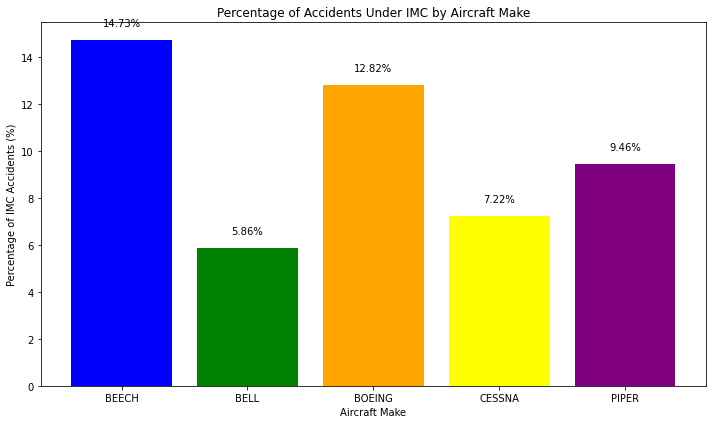

In [56]:
#Visualization for aircraft make with the lowest proportion of accidents under IMC

import matplotlib.pyplot as plt

# Data used
aircraft_make = ['BEECH', 'BELL', 'BOEING', 'CESSNA', 'PIPER']
imc_percentages = [14.73, 5.86, 12.82, 7.22, 9.46]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(aircraft_make, imc_percentages, color=['blue', 'green', 'orange', 'yellow', 'purple'])

# Add titles and labels
plt.title('Percentage of Accidents Under IMC by Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Percentage of IMC Accidents (%)')

# Annotate the bars with percentages
for i, percentage in enumerate(imc_percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()



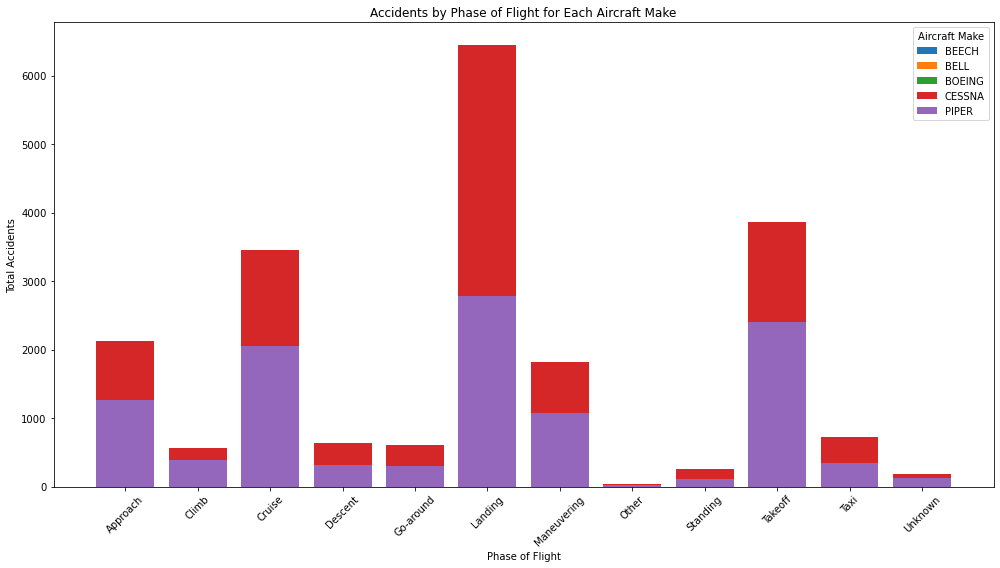

In [59]:
#Let's analyze the aircraft accidents with respect to the broad phase of flight.
#Accidents are categorized by the broad phase of flight, such as Approach, Climb, Cruise, Descent, Landing, etc.
#The data includes accident counts for five aircraft makes: BEECH, BELL, BOEING, CESSNA, and PIPER.
#Identify which phases of flight have the highest number of accidents for each aircraft make.
#Compare the accident distribution across different makes to understand common risk areas.

import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Make': ['BEECH', 'BEECH', 'BEECH', 'BEECH', 'BEECH', 'BEECH', 'BEECH', 'BEECH', 'BEECH', 'BEECH', 'BEECH', 'BEECH',
             'BELL', 'BELL', 'BELL', 'BELL', 'BELL', 'BELL', 'BELL', 'BELL', 'BELL', 'BELL', 'BELL', 'BELL',
             'BOEING', 'BOEING', 'BOEING', 'BOEING', 'BOEING', 'BOEING', 'BOEING', 'BOEING', 'BOEING', 'BOEING', 'BOEING', 'BOEING',
             'CESSNA', 'CESSNA', 'CESSNA', 'CESSNA', 'CESSNA', 'CESSNA', 'CESSNA', 'CESSNA', 'CESSNA', 'CESSNA', 'CESSNA', 'CESSNA',
             'PIPER', 'PIPER', 'PIPER', 'PIPER', 'PIPER', 'PIPER', 'PIPER', 'PIPER', 'PIPER', 'PIPER', 'PIPER', 'PIPER'],
    'Broad.phase.of.flight': ['Approach', 'Climb', 'Cruise', 'Descent', 'Go-around', 'Landing', 'Maneuvering', 'Other', 'Standing', 'Takeoff', 'Taxi', 'Unknown',
                              'Approach', 'Climb', 'Cruise', 'Descent', 'Go-around', 'Landing', 'Maneuvering', 'Other', 'Standing', 'Takeoff', 'Taxi', 'Unknown',
                              'Approach', 'Climb', 'Cruise', 'Descent', 'Go-around', 'Landing', 'Maneuvering', 'Other', 'Standing', 'Takeoff', 'Taxi', 'Unknown',
                              'Approach', 'Climb', 'Cruise', 'Descent', 'Go-around', 'Landing', 'Maneuvering', 'Other', 'Standing', 'Takeoff', 'Taxi', 'Unknown',
                              'Approach', 'Climb', 'Cruise', 'Descent', 'Go-around', 'Landing', 'Maneuvering', 'Other', 'Standing', 'Takeoff', 'Taxi', 'Unknown'],
    'Total_Accidents': [606, 177, 733, 158, 140, 914, 204, 6, 57, 841, 107, 31,
                        138, 33, 419, 42, 3, 220, 624, 5, 62, 289, 23, 10,
                        113, 83, 184, 88, 12, 205, 49, 1, 74, 187, 156, 2,
                        2127, 560, 3448, 637, 610, 6453, 1814, 30, 262, 3861, 730, 178,
                        1261, 390, 2058, 314, 298, 2779, 1068, 17, 113, 2401, 337, 120]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each aircraft make
for make in df['Make'].unique():
    make_data = df[df['Make'] == make]
    ax.bar(make_data['Broad.phase.of.flight'], make_data['Total_Accidents'], label=make)

# Add titles and labels
plt.title('Accidents by Phase of Flight for Each Aircraft Make')
plt.xlabel('Phase of Flight')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45)
plt.legend(title='Aircraft Make')

# Show the plot
plt.tight_layout()
plt.show()
